In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
import seaborn as sns
from util import *
import keras
%matplotlib inline

In [23]:

filtered_data = pd.read_csv('import.csv')
filtered_data.head(2)

,Unnamed: 0,points,price,num_description,num_variety,year_code,cat_country,pos_sentiment,neg_sentiment,country_code,province_code,designation_code,point_cat
0,0,88.870874,20.0,0.002999,0.000015,2011.0,1,0.175,0.0,0,0,0,3
1,1,88.041695,28.0,0.003312,0.000030,2011.0,2,0.236,0.0,1,1,1,3


In [24]:
filtered_data.columns

Index(['Unnamed: 0', 'points', 'price', 'num_description', 'num_variety',
       'year_code', 'cat_country', 'pos_sentiment', 'neg_sentiment',
       'country_code', 'province_code', 'designation_code', 'point_cat'],
      dtype='object')

In [25]:
filtered_data = filtered_data[[ 'points', 'price', 'num_description', 'num_variety', 'cat_country', 'pos_sentiment', 'neg_sentiment',
       'country_code', 'province_code', 'designation_code', 'point_cat']]
filtered_data.head(2)

,points,price,num_description,num_variety,cat_country,pos_sentiment,neg_sentiment,country_code,province_code,designation_code,point_cat
0,88.870874,20.0,0.002999,0.000015,1,0.175,0.0,0,0,0,3
1,88.041695,28.0,0.003312,0.000030,2,0.236,0.0,1,1,1,3


In [26]:
# pos_sentiment = doPCA(filtered_data[[ 'country_code','province_code', 'designation_code']],1,['pC1'])

# finalDf = pd.concat([pos_sentiment, filtered_data], axis = 1)
# finalDf.head(3)
# sns.pairplot(finalDf)

In [27]:
X = filtered_data[['points', 'num_description', 'num_variety', 'cat_country', 'pos_sentiment', 'neg_sentiment',
       'country_code', 'province_code', 'designation_code', 'point_cat']].values
y = filtered_data['price'].values


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=101)

np.any(np.isnan(y_test))

False

In [29]:
model = Sequential()
model.add(Dense(1, input_dim=len(X_train[0]),kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(Adam(lr=0.01), 'mean_squared_error')
model.fit(X_train, y_train, epochs=50,batch_size=64)

Epoch 1/50
69999/69999 [==============================] - 1s 15us/step - loss: 1482.3614
Epoch 2/50
69999/69999 [==============================] - 1s 12us/step - loss: 1430.2100
Epoch 3/50
69999/69999 [==============================] - 1s 11us/step - loss: 1446.0015
Epoch 4/50
69999/69999 [==============================] - 1s 12us/step - loss: 1461.4107
Epoch 5/50
69999/69999 [==============================] - 1s 12us/step - loss: 1430.0304
Epoch 6/50
69999/69999 [==============================] - 1s 11us/step - loss: 1416.5730
Epoch 7/50
69999/69999 [==============================] - 1s 11us/step - loss: 1415.2235
Epoch 8/50
69999/69999 [==============================] - 1s 11us/step - loss: 1488.3990
Epoch 9/50
69999/69999 [==============================] - 1s 11us/step - loss: 1414.6867
Epoch 10/50
69999/69999 [==============================] - 1s 11us/step - loss: 1425.3205
Epoch 11/50
69999/69999 [==============================] - 1s 11us/step - loss: 1434.2514
Epoch 12/50
69999/6

In [33]:
predict = model.predict(X_test)

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 19.445421847225372
MSE: 1363.3350655309555
RMSE: 36.92336747279364


In [13]:
filtered_data.columns

Index(['points', 'price', 'num_description', 'num_variety', 'year_code',
       'cat_country', 'pos_sentiment', 'neg_sentiment', 'country_code',
       'province_code', 'designation_code', 'point_cat'],
      dtype='object')

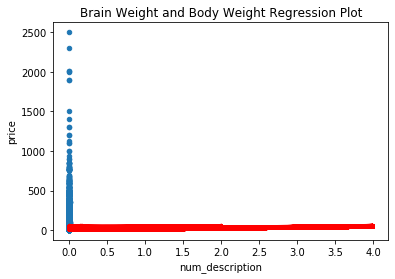

In [21]:



filtered_data.plot(kind='scatter',
          x = 'num_description',
          y = 'price',
          title='Brain Weight and Body Weight Regression Plot')

plt.plot(X_test, predict, color='red', linewidth=3)

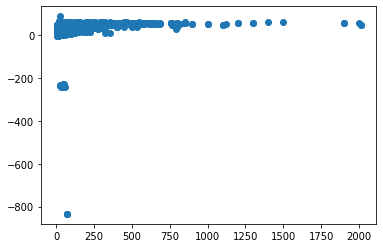

In [25]:
plt.scatter(y_test,predict)

In [23]:
# sns.distplot((y_test-predict),bins=50);

MAE: 16.091600396319798
MSE: 1276.7048811775855
RMSE: 35.731007279078845
